In [38]:
import scanpy as sc
import numpy as np
import pandas as pd
import scgen
import pymn


Global seed set to 0


In [3]:
annotated_rice = sc.read_h5ad('/data/passala/Generated_Tables/Temp_junk/sec_rice_for_combining_genes.h5ad')
annotated_maize = sc.read_h5ad('/data/passala/Generated_Tables/Temp_junk/sec_maize_for_combining_genes.h5ad')

In [19]:
annotated_rice

AnnData object with n_obs × n_vars = 13077 × 37863
    obs: 'leiden', 'Cell Cluster Annotation'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell Cluster Annotation_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
gene_family_map = pd.read_csv('/data/passala/Generated_Tables/Temp_junk/maize_rice_map_with_group_id.csv')

In [7]:
panda_version_of_rice_sc = pd.DataFrame(columns = annotated_rice.var_names, data = annotated_rice.X.todense())
panda_version_of_maize_sc = pd.DataFrame(columns = annotated_maize.var_names, data = annotated_maize.X.todense())


In [9]:
one_to_one_maize_groups_avg = {}
one_to_one_rice_groups_avg = {}
many_many_maize_groups_avg = {}
many_many_rice_groups_avg = {}



In [10]:
for current_group in list(set(gene_family_map['Group ID'].to_list())):

    # Check Rice Genes
    rice_genes_in_map = list(set(gene_family_map['rice'].loc[gene_family_map['Group ID'] == current_group].to_list()))
    rice_genes_in_map_and_data = list(set(rice_genes_in_map) & set(annotated_rice.var_names.to_list()))

    # Check Maize Genes In group
    maize_genes_in_map = list(set(gene_family_map['maize'].loc[gene_family_map['Group ID'] == current_group].to_list()))
    maize_genes_in_map_and_data = list(set(maize_genes_in_map) & set(annotated_maize.var_names.to_list()))

    current_column_name = f"Group {current_group}"
    ## Skip if no genes in either species
    if (len(maize_genes_in_map_and_data) == 0) or (len(rice_genes_in_map_and_data) == 0):
        continue

    rice_averaged_group = panda_version_of_rice_sc[rice_genes_in_map_and_data].mean(axis = 1)
    maize_averaged_group = panda_version_of_maize_sc[maize_genes_in_map_and_data].mean(axis = 1)

    if (len(maize_genes_in_map_and_data) > 1) or (len(rice_genes_in_map_and_data) > 1):
        many_many_maize_groups_avg[current_column_name] = maize_averaged_group
        many_many_rice_groups_avg[current_column_name] = rice_averaged_group
    
    one_to_one_maize_groups_avg[current_column_name] = maize_averaged_group
    one_to_one_rice_groups_avg[current_column_name] = rice_averaged_group



In [11]:
many_many_rice_panda = pd.DataFrame.from_dict(data=many_many_rice_groups_avg)
many_many_maize_panda = pd.DataFrame.from_dict(data=many_many_maize_groups_avg)
one_one_rice_panda = pd.DataFrame.from_dict(data = one_to_one_rice_groups_avg)
one_one_maize_panda = pd.DataFrame.from_dict(data = one_to_one_maize_groups_avg)


In [13]:
many_many_rice_panda

,Group 0,Group 2,Group 3,Group 6,Group 10,Group 11,Group 12,Group 15,Group 17,Group 18,...,Group 9329,Group 9337,Group 9342,Group 9345,Group 9351,Group 9360,Group 9363,Group 9364,Group 9366,Group 9370
0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.261932,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.047728,1.047728,0.0,0.0,0.000000,0.000000
1,0.470111,0.0,0.000000,0.000000,0.989962,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,1.011594,0.0,0.000000,0.000000,0.840873,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.159226,0.738949,0.0,0.0,0.000000,0.738949
3,2.380799,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,1.380498,0.0,0.000000,0.000000,0.000000,0.0,0.399416,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.237181,0.000000,0.0,0.0,0.798832,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13072,2.061578,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.759980,0.000000,0.0,0.0,0.000000,0.000000
13073,1.440582,0.0,0.000000,0.000000,1.440582,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
13074,0.000000,0.0,0.722334,0.722334,0.000000,0.0,0.000000,0.722334,0.0,0.0,...,0.0,0.0,0.0,0.0,1.444667,0.000000,0.0,0.0,0.000000,0.000000
13075,0.738835,0.0,0.000000,0.000000,0.427864,0.0,0.129184,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.310001,0.000000,0.0,0.0,0.000000,0.516735


In [35]:
one_one_rice_sc = sc.AnnData(X = one_one_rice_panda.values, var= pd.DataFrame(index = one_one_rice_panda.columns), obs = annotated_rice.obs)
one_one_maize_sc = sc.AnnData(X = one_one_maize_panda.values, var= pd.DataFrame(index = one_one_maize_panda.columns), obs = annotated_maize.obs)

many_many_rice_sc = sc.AnnData(X = many_many_rice_panda.values, var= pd.DataFrame(index = many_many_rice_panda.columns), obs = annotated_rice.obs)
many_many_maize_sc = sc.AnnData(X = many_many_maize_panda.values, var= pd.DataFrame(index = many_many_maize_panda.columns), obs = annotated_maize.obs)



In [37]:
many_many_rice_sc

AnnData object with n_obs × n_vars = 13077 × 2906
    obs: 'leiden', 'Cell Cluster Annotation'

In [39]:
concatendated_rice_maize_dataset = one_one_maize_sc.concatenate(one_one_rice_sc, batch_key = 'Species', batch_categories = ['Maize','Rice'])


/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [40]:
scgen.SCGEN.setup_anndata(concatendated_rice_maize_dataset, batch_key="Species", labels_key="Cell Cluster Annotation")


In [41]:
model = scgen.SCGEN(concatendated_rice_maize_dataset)

In [42]:
model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=20,
)

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 12/100:  12%|█▏        | 12/100 [02:33<18:45, 12.79s/it, loss=320, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 1486.229. Signaling Trainer to stop.


In [43]:
corrected_adata = model.batch_removal()
corrected_adata

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup       


AnnData object with n_obs × n_vars = 15909 × 7392
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Species', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'latent', 'corrected_latent'

         Falling back to preprocessing with `sc.pp.pca` and default params.


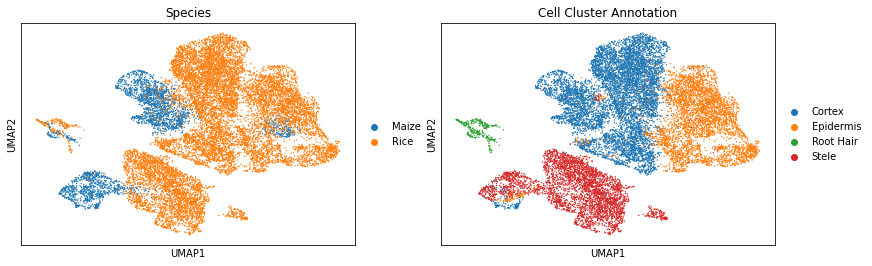

In [44]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['Species', 'Cell Cluster Annotation'])

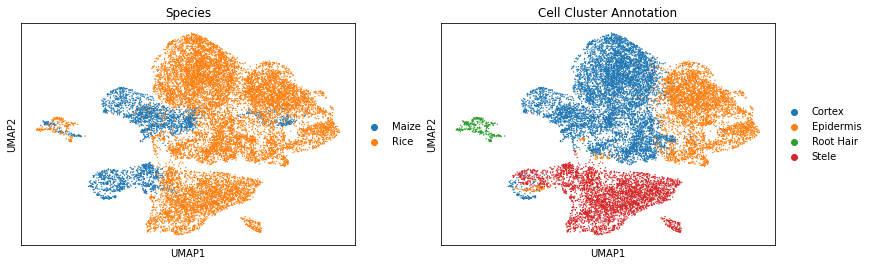

In [45]:
sc.pp.neighbors(corrected_adata, use_rep="corrected_latent")
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['Species', 'Cell Cluster Annotation'])

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


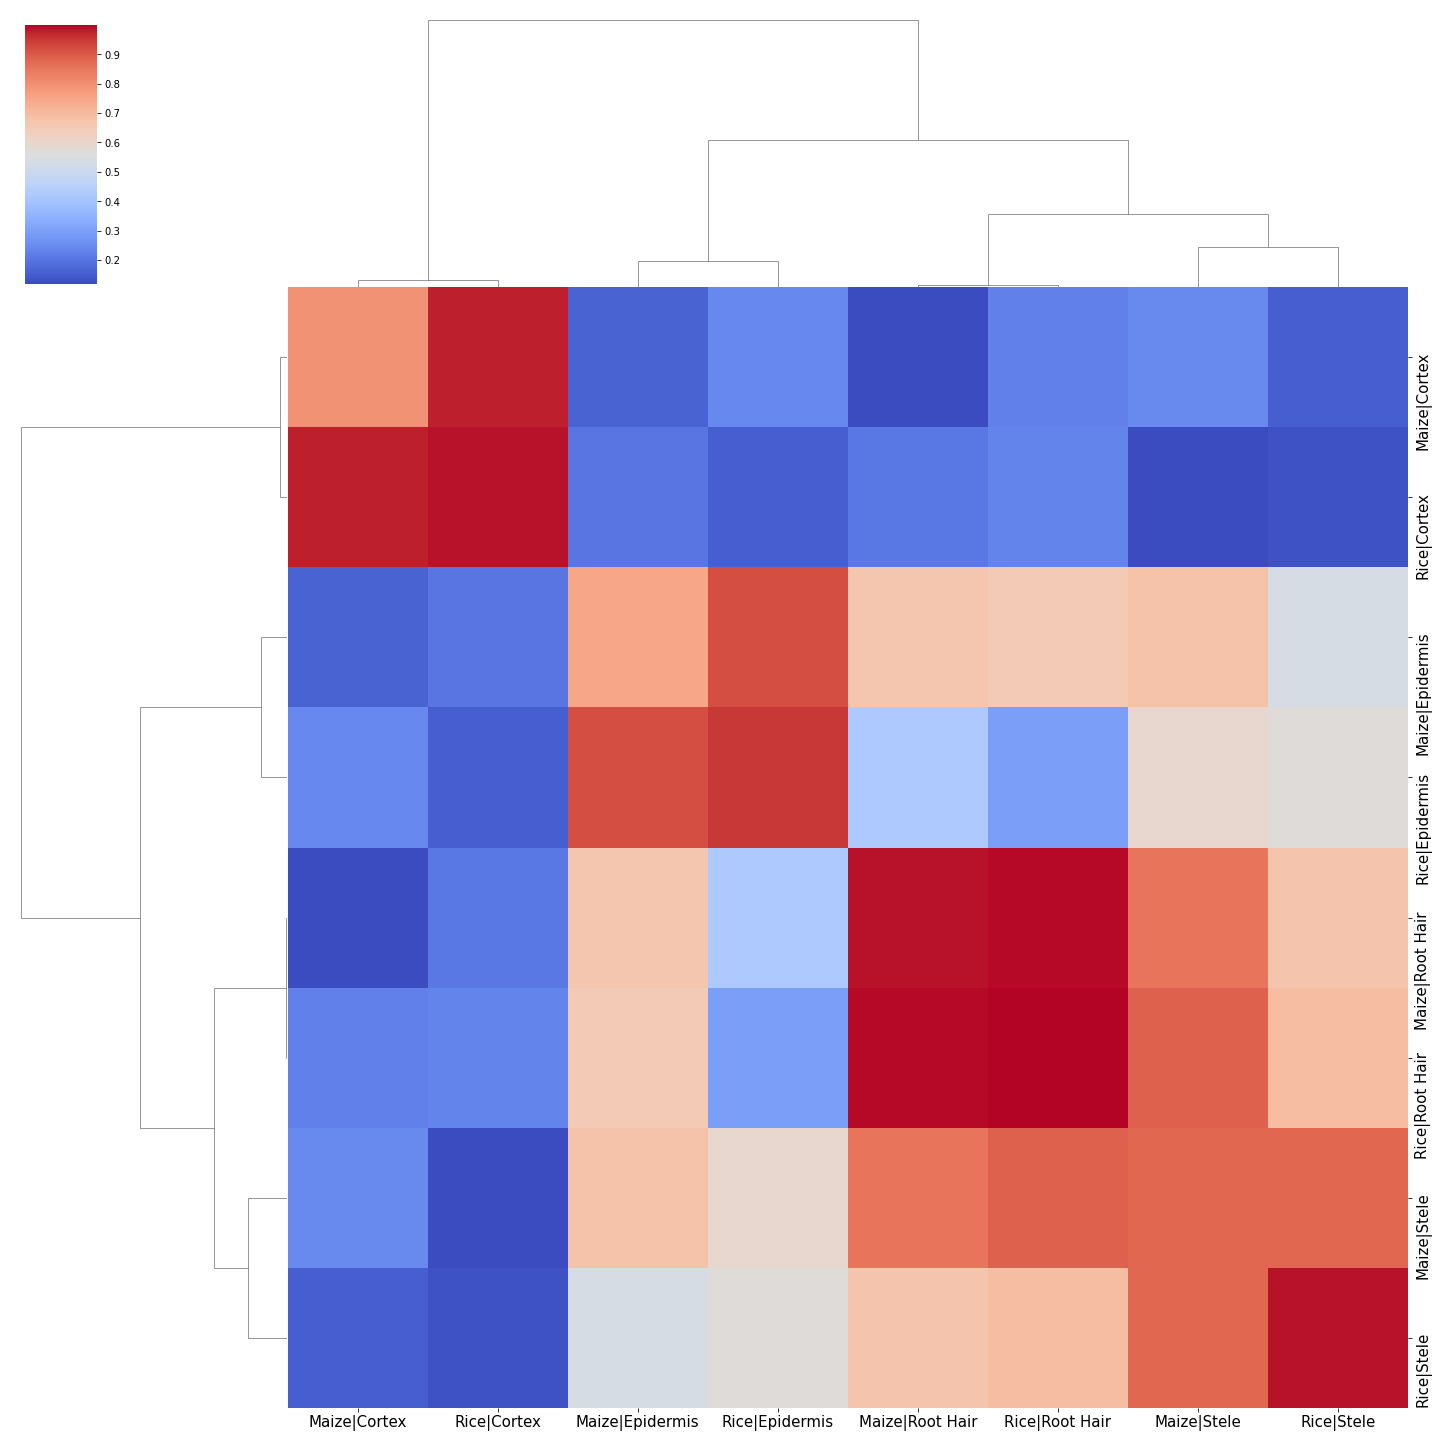

In [46]:
pymn.variableGenes(corrected_adata,study_col = 'Species')
pymn.MetaNeighborUS(corrected_adata,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(corrected_adata,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)

In [47]:
def cell_type_score_calculator(adata):
    species = ['Rice','Maize']
    list_of_celltype_scores = []
    for celltype in ['Epidermis', 'Cortex', 'Stele', 'Root Hair']:
        target_1 = 'Rice'+'|'+celltype 
        target_2 = 'Maize'+'|'+celltype 
        peripheral_1 = adata.uns['MetaNeighborUS'].at[target_1,target_2]
        peripheral_2 = adata.uns['MetaNeighborUS'].at[target_2,target_1]
        avg_score = (peripheral_1+peripheral_2)/2
        list_of_celltype_scores.append(avg_score)
    return list_of_celltype_scores

In [48]:
cell_type_score_calculator(corrected_adata)

[0.9200138942531642,
 0.9775350162800818,
 0.8784175403418724,
 0.9952015139340478]

In [57]:
many_many_only_concatendated = many_many_maize_sc.concatenate(many_many_rice_sc, batch_key = 'Species', batch_categories = ['Maize','Rice'])


/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [58]:
scgen.SCGEN.setup_anndata(many_many_only_concatendated, batch_key="Species", labels_key="Cell Cluster Annotation")


In [59]:
model_many = scgen.SCGEN(many_many_only_concatendated)

In [60]:
model_many.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=20,
)

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 24/100:  24%|██▍       | 24/100 [02:58<09:24,  7.43s/it, loss=109, v_num=1]
Monitored metric elbo_validation did not improve in the last 20 records. Best score: 854.284. Signaling Trainer to stop.


In [61]:
corrected_many = model_many.batch_removal()
corrected_many

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup       


AnnData object with n_obs × n_vars = 15909 × 2906
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Species', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'latent', 'corrected_latent'

         Falling back to preprocessing with `sc.pp.pca` and default params.


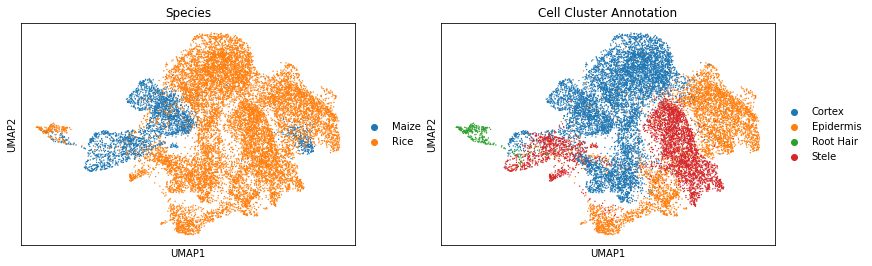

In [62]:
sc.pp.neighbors(corrected_many)
sc.tl.umap(corrected_many)
sc.pl.umap(corrected_many, color=['Species', 'Cell Cluster Annotation'])

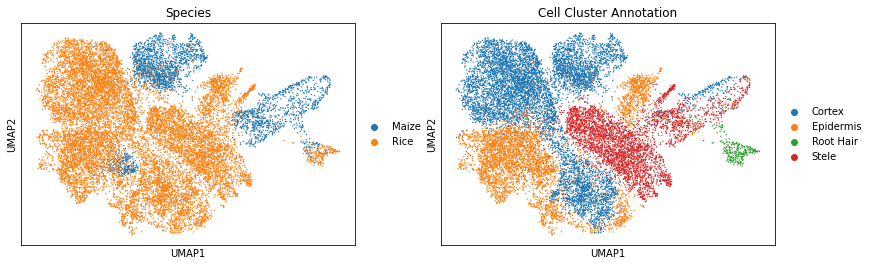

In [63]:
sc.pp.neighbors(corrected_many, use_rep="corrected_latent")
sc.tl.umap(corrected_many)
sc.pl.umap(corrected_many, color=['Species', 'Cell Cluster Annotation'])

/home/passala/miniconda3/envs/Jonathan_tester/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


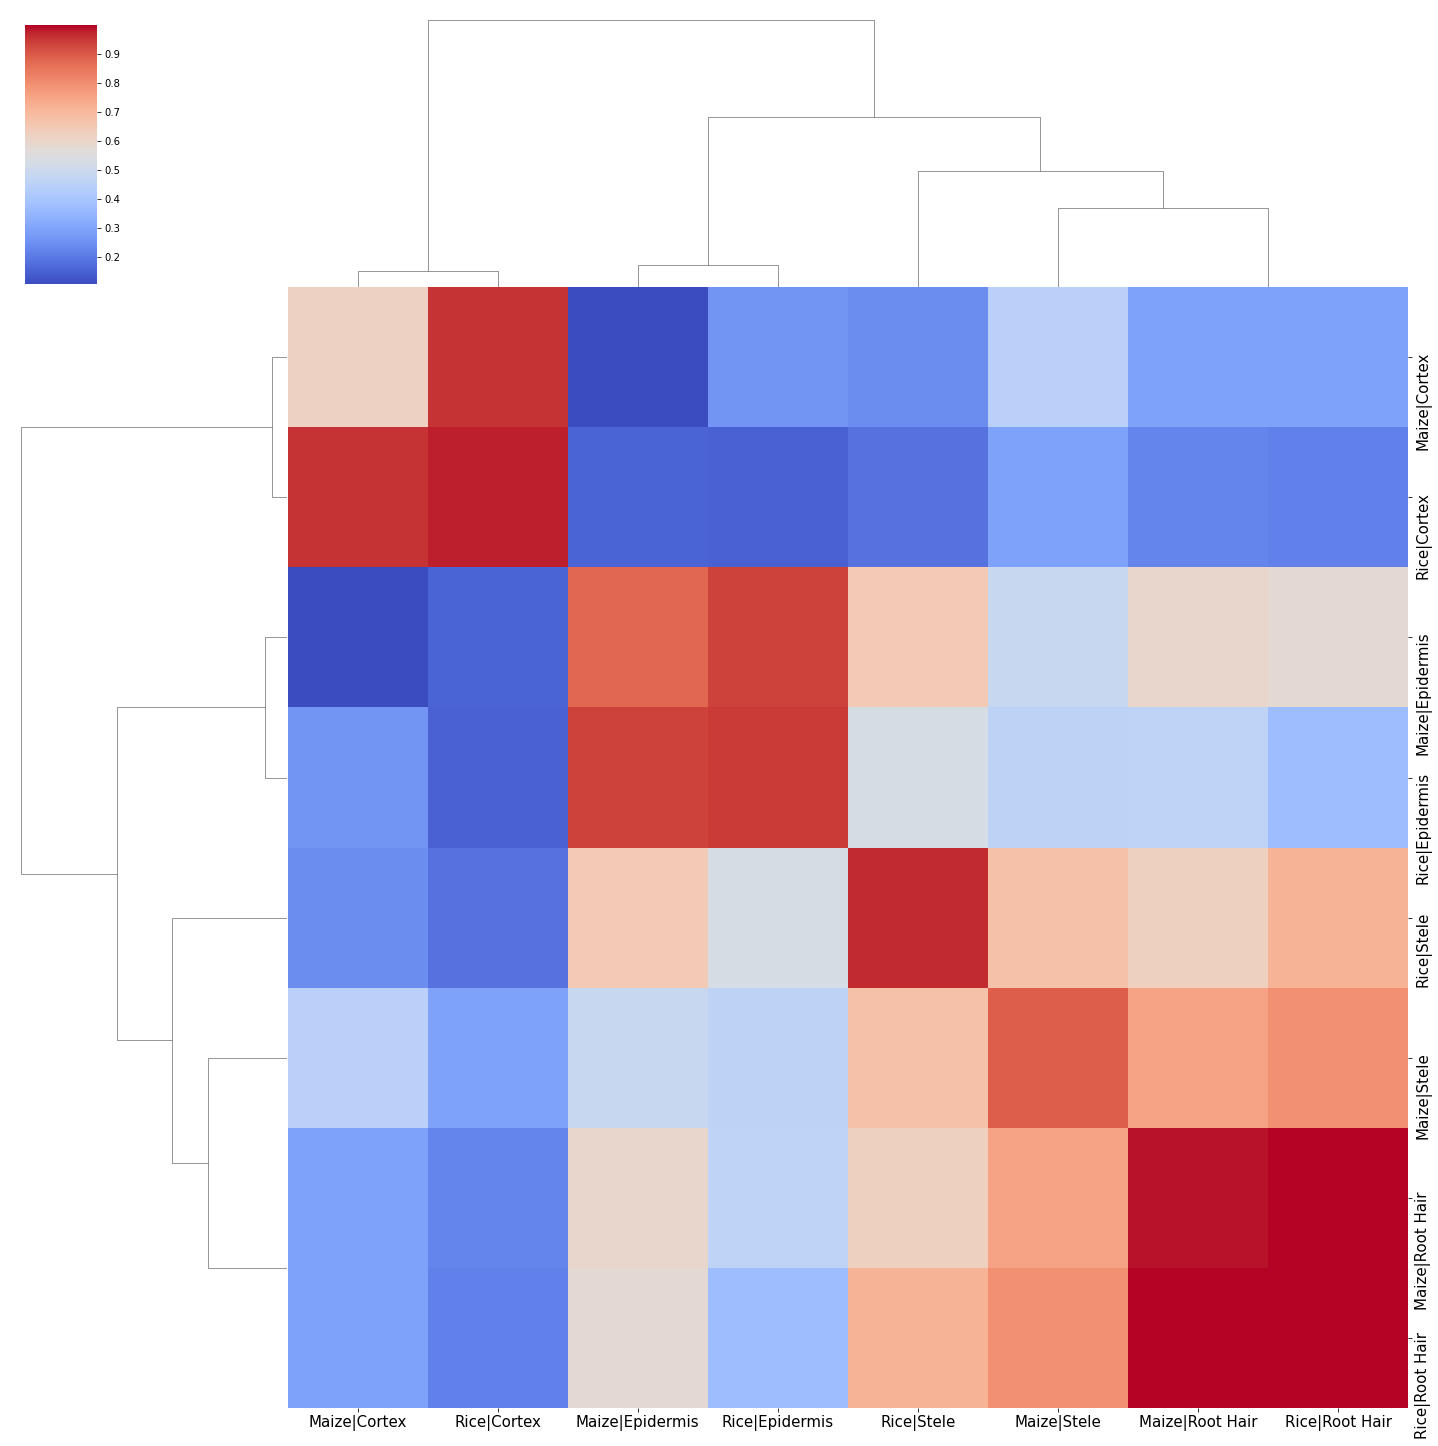

In [64]:
pymn.variableGenes(corrected_many,study_col = 'Species')
pymn.MetaNeighborUS(corrected_many,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(corrected_many,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)

In [65]:
cell_type_score_calculator(corrected_many)

[0.9362994913387817, 0.9550479934852157, 0.672613311747335, 0.9983878406190398]